<a href="https://colab.research.google.com/github/brunomoraisnc/into-to-data-science-ifb/blob/master/5_8_Acr%C3%A9scimo_de_vari%C3%A1veis_BRUNO_MORAIS_NEVES_DE_CASTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

1. Carregar o seu arquivo df_OVNI_limpo.csv (arquivo gerado após a limpeza de dados efetuada na atividade 5.7) em um dataframe;

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/oliveirafhm/data_science/master/df_OVNI_limpo.csv')
df = df.drop(['Unnamed: 0'], axis=1)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80046 entries, 0 to 80045
Data columns (total 4 columns):
Date / Time    80046 non-null object
City           80046 non-null object
State          80046 non-null object
Shape          80046 non-null object
dtypes: object(4)
memory usage: 2.4+ MB
None


,Date / Time,City,State,Shape
0,1/29/97 23:15,East Greenwich,RI,Disk
1,1/26/97 22:00,Flagstaff,AZ,Light
2,1/25/97 21:00,Marion,WI,Triangle
3,1/24/97 19:00,Alta,UT,Other
4,1/23/97 18:30,North Kingstown,RI,Triangle


2. Dividir o conteúdo da coluna Date / Time em duas novas colunas no mesmo dataframe e deletar a coluna Date / Time .

In [0]:
df['Date / Time'] = pd.to_datetime(df['Date / Time'], infer_datetime_format=True)

df['sight_date'] = df['Date / Time'].dt.strftime(date_format='%Y-%m-%d')
df['sight_time'] = df['Date / Time'].dt.strftime(date_format='%H:%M')

df = df.drop(['Date / Time'], axis=1)

df.head()

,City,State,Shape,sight_date,sight_time
0,East Greenwich,RI,Disk,1997-01-29,23:15
1,Flagstaff,AZ,Light,1997-01-26,22:00
2,Marion,WI,Triangle,1997-01-25,21:00
3,Alta,UT,Other,1997-01-24,19:00
4,North Kingstown,RI,Triangle,1997-01-23,18:30


3. Fazer o mesmo procedimento para dias da semana. Será que existe um dia da semana com mais ocorrências de relatórios para OVNIs? Para descobrir isso, você deve criar uma nova coluna chamada weekdays.

In [0]:
df['sight_weekday'] = pd.to_datetime(df['sight_date'])
df['sight_weekday'] = df['sight_weekday'].dt.weekday_name

weekday_ptbr = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df = df.replace({'sight_weekday': weekday_ptbr})

df.head()

,City,State,Shape,sight_date,sight_time,sight_weekday
0,East Greenwich,RI,Disk,1997-01-29,23:15,Quarta-feira
1,Flagstaff,AZ,Light,1997-01-26,22:00,Domingo
2,Marion,WI,Triangle,1997-01-25,21:00,Sábado
3,Alta,UT,Other,1997-01-24,19:00,Sexta-feira
4,North Kingstown,RI,Triangle,1997-01-23,18:30,Quinta-feira


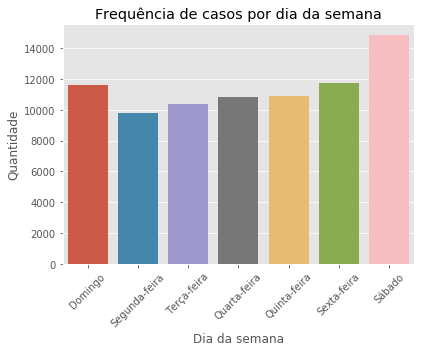

In [0]:
weekday_freq = df['sight_weekday'].value_counts().loc[['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']].reset_index()

plt.figure(figsize=(6,5))
fig = sns.barplot(x='index', y='sight_weekday', data=weekday_freq)

plt.title('Frequência de casos por dia da semana')

plt.xlabel('Dia da semana')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

R: Sábado é o dia com maior quantidade de ocorrências

4. Separar as variáveis mês (Month) e dia (Day). Desse modo, será possível refinar as pesquisas.

In [0]:
df['sight_day'] =  pd.to_datetime(df['sight_date']).dt.day
df['sight_month'] = pd.to_datetime(df['sight_date']).dt.month

df.head()

,City,State,Shape,sight_date,sight_time,sight_weekday,sight_day,sight_month
0,East Greenwich,RI,Disk,1997-01-29,23:15,Quarta-feira,29,1
1,Flagstaff,AZ,Light,1997-01-26,22:00,Domingo,26,1
2,Marion,WI,Triangle,1997-01-25,21:00,Sábado,25,1
3,Alta,UT,Other,1997-01-24,19:00,Sexta-feira,24,1
4,North Kingstown,RI,Triangle,1997-01-23,18:30,Quinta-feira,23,1


5. Por fim, salvar o dataframe resultante em um arquivo .csv com o nome: 'df_OVNI_preparado'.


In [0]:
file_name = 'df_OVNI_preparado'
df.to_csv(file_name + '.csv')

In [0]:
# !ipython nbconvert --to html 5_8_Acréscimo_de_variáveis_BRUNO_MORAIS_NEVES_DE_CASTRO.ipynb